In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Наивный Байес

## 1. Чтение данных

Байесовские модели находят применение в задачах классификации. Конечно, сейчас есть много более современных подходов решения такого рода задач, но, тем не менее, Байевские модели тоже хорошо справляются с таким задачами и при этом требуют мало ресурсов.

In [3]:
path_to_data = '/content/drive/MyDrive/NLP_manual/Datasets/Corona_NLP_train.csv'
df = pd.read_csv(path_to_data, encoding='ISO-8859-1')

In [4]:
df = df[['OriginalTweet', 'Sentiment']]

In [5]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


1. Сократите количество категорий: замените Extremely Negative на Negative, Extremely Positive на Positive. Запишите изменённые категории в столбец 'new_senntiment'.

In [ ]:
# <YOUR CODE HERE> #

2. Посмотрите на распределение категорий. Насколько оно удачное?

   Выберите случайные 7500 предложений для каждой категории, чтобы выравнять выборку.

In [ ]:
# <YOUR CODE HERE> #

## 2. Baseline

Давайте попробуем на чистых данных обучить обычную Байесовскую модель из sklearn

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

Для того, чтобы не повторять одинаковые действия, как векторизация и обучение модели, можно использовать класс из sklearn - [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)

In [ ]:
# этот класс нужен, чтобы преобразовать разреженную матрицу
# в матрицу, которая принимается на вход модели GaussianNB
class DenseTransformer():

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

pipe_cnt = Pipeline([
    ('vect', CountVectorizer()),
    ('transform', DenseTransformer()),
    ('clf', GaussianNB())
])

Не забудьте разделить данные на тренировочные и тестовые.

In [ ]:
# <YOUR CODE HERE> #

Чтобы было удобнее сравнивать подходы, создадим таблицу, где будем записывать название модели и метрики. Посчитайте и добавьте в таблицу accuracy, микро- и макро- f1-score.

In [ ]:
results = pd.DataFrame(columns=['model', 'acc', 'f1_micro', 'f1_macro'])

## 2. Чистка данных

Перед тем как данные использовать для классификации, необходимо данные почистить и лемматизировать. Давайте посмотрим на некоторые твиты, чтобы понять, какого формата они бывают.

In [ ]:
print(df['OriginalTweet'][0])
print(df['OriginalTweet'][1])
print(df['OriginalTweet'][3])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order





#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j


Как можно заметить, у нас есть четыре типа данных:
- просто текст твита
- хэштеги
- упомнинания других людей
- ссылки на страницы или твиты

Упоминания и ссылки точно не дают какой-то информации. А вот хештеги могут иметь значение, поэтому их можно оставить. При этом, так как хештеги встречаются в похожих постах, можно не удалять их знак "#", так как он тогда послужит маркером хештега и поможет лучше различать тексты.

Чтобы получить чистые данные, следует:
- очистить от чисел, знаков препинания, ссылок и упоминаний
- привести к нижнему регистру и лемматизировать

In [ ]:
# <YOUR CODE HERE> #

Обучите модель снова, замерьте изменения, запишите результаты в таблицу

In [ ]:
# <YOUR CODE HERE> #

## Ещё эксперименты

Давайте проведём ещё эксперименты и сравним результаты. Придумайте, как можно ещё изменить данные или, возможно, попробовать другую модель. Поэкспериментируйте и выберите лучший подход. Постарайтесь получить значения больше 0.6.

Вот некоторые идеи:
- попробовать добавить стоп-слова
- попробовать другой векторайзер (tf-idf, например)
- добавить нграммы
- посмотреть другие наивные модели в библиотеке sklearn

In [ ]:
# <YOUR CODE HERE> #

-------

# Ответы

## Чтение данных

In [6]:
path_to_data = '/content/drive/MyDrive/NLP_manual/Datasets/Corona_NLP_train.csv'
df = pd.read_csv(path_to_data, encoding='ISO-8859-1')

In [7]:
df = df[['OriginalTweet', 'Sentiment']]

In [ ]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Сокращение количества категорий

1. Сократите количество категорий: замените Extremely Negative на Negative, Extremely Positive на Positive. Запишите изменённые категории в столбец 'new_senntiment'.

In [8]:
df['new_sentiment'] = df['Sentiment'].replace({'Extremely Positive': 'Positive', 'Extremely Negative': 'Negative'})

2. Посмотрите на распределение категорий. Насколько оно удачное?

   Выберите случайные 7500 предложений для каждой категории, чтобы выравнять выборку.

<Axes: >

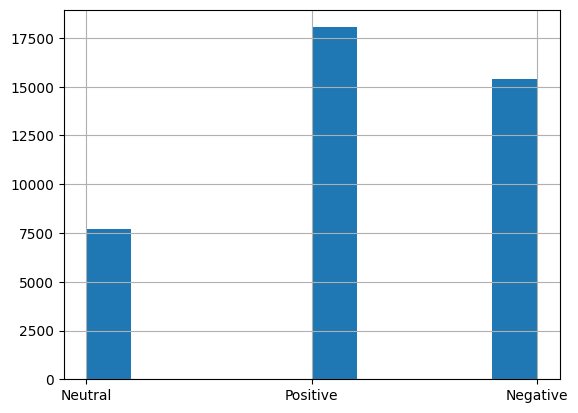

In [9]:
df['new_sentiment'].hist()

In [10]:
pos = df[df['new_sentiment']=='Positive'].sample(7500)
neg = df[df['new_sentiment']=='Negative'].sample(7500)
neut = df[df['new_sentiment']=='Neutral'].sample(7500)

new_df = pd.concat([pos, neg, neut])

## Baseline

Давайте попробуем на чистых данных обучить обычную Байесовскую модель из sklearn

In [11]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

Для того, чтобы не повторять одинаковые действия, как векторизация и обучение модели, можно использовать класс из sklearn - [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)

In [12]:
class DenseTransformer():

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

pipe_cnt = Pipeline([
    ('vect', CountVectorizer()),
    ('transform', DenseTransformer()),
    ('clf', GaussianNB())
])

Не забудьте разделить данные на тренировочные и тестовые.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    new_df['OriginalTweet'].tolist(),
    new_df.new_sentiment,
    random_state=42, train_size=0.7
)
pipe_cnt.fit(X_train, y_train)
preds = pipe_cnt.predict(X_test)
print('acc', acc:=accuracy_score(preds, y_test))
print('f1_micro', f1_micro:=f1_score(preds, y_test, average='micro'))
print('f1_macro', f1_macro:=f1_score(preds, y_test, average='macro'))

acc 0.4652644052732928
f1_micro 0.4652644052732928
f1_macro 0.44931130000300873


Чтобы было удобнее сравнивать подходы, создадим таблицу, где будем записывать название модели и метрики. Посчитайте и добавьте в таблицу accuracy, микро- и макро- f1-score.

In [14]:
results = pd.DataFrame(columns=['model', 'acc', 'f1_micro', 'f1_macro'])

now_res = {'model': 'Original', 'acc': acc, 'f1_micro': f1_micro, 'f1_macro': f1_macro}
results = results.append(now_res, ignore_index=True)

<ipython-input-14-20d6e9c193c8>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(now_res, ignore_index=True)


In [15]:
results

,model,acc,f1_micro,f1_macro
0,Original,0.465264,0.465264,0.449311


## Чистка данных

Перед тем как данные использовать для классификации, необходимо данные почистить и лемматизировать. Давайте посмотрим на некоторые твиты, чтобы понять, какого формата они бывают.

Как можно заметить, у нас есть четыре типа данных:
- просто текст твита
- хэштеги
- упомнинания других людей
- ссылки на страницы или твиты

Упоминания и ссылки точно не дают какой-то информации. А вот хештеги могут иметь значение, поэтому их можно оставить. При этом, так как хештеги встречаются в похожих постах, можно не удалять их знак "#", так как он тогда послужит маркером хештега и поможет лучше различать тексты.

Чтобы получить чистые данные, следует:
- очистить от чисел, знаков препинания, ссылок и упоминаний
- привести к нижнему регистру и лемматизировать

In [16]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

stops = stopwords.words('english')
def tweet_preparation(tweet):
    tokens = tweet.split()
    clean_tokens = []
    for token in tokens:
        if not token.startswith('@'):
            token = token.strip('!"$%&\'()*+,-./:;<=>?@[\\]^_`{|}~').lower()
            if token.isalpha() and token not in stops:
                clean_tokens.append(wordnet_lemmatizer.lemmatize((token)))
    return ' '.join(clean_tokens)

In [17]:
new_df['lemmas'] = new_df['OriginalTweet'].apply(tweet_preparation)

Обучите модель снова, замерьте изменения, запишите результаты в таблицу

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    new_df['lemmas'].tolist(),
    new_df.new_sentiment,
    random_state=42, train_size=0.7
)
pipe_cnt.fit(X_train, y_train)
preds = pipe_cnt.predict(X_test)
print('acc', acc:=accuracy_score(preds, y_test))
print('f1_micro', f1_micro:=f1_score(preds, y_test, average='micro'))
print('f1_macro', f1_macro:=f1_score(preds, y_test, average='macro'))

acc 0.49340838394311953
f1_micro 0.49340838394311953
f1_macro 0.47819390222344027


In [19]:
now_res = {'model': 'Clean_lemmas', 'acc': acc, 'f1_micro': f1_micro, 'f1_macro': f1_macro}
results = results.append(now_res, ignore_index=True)

<ipython-input-19-17a64fb9d0d5>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(now_res, ignore_index=True)


In [20]:
results

,model,acc,f1_micro,f1_macro
0,Original,0.465264,0.465264,0.449311
1,Clean_lemmas,0.493408,0.493408,0.478194


## Эксперименты

#### 1. Давайте попробуем оставить стоп-слова

In [21]:
stops = stopwords.words('english')
def tweet_preparation_with_stops(tweet):
    tokens = tweet.split()
    clean_tokens = []
    for token in tokens:
        if not token.startswith(('@', '#')):
            token = token.strip(punctuation).lower()
            if token.isalpha():
                clean_tokens.append(wordnet_lemmatizer.lemmatize((token)))
    return ' '.join(clean_tokens)

In [22]:
new_df['lemmas_with_stops'] = new_df['OriginalTweet'].apply(tweet_preparation_with_stops)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    new_df['lemmas_with_stops'].tolist(),
    new_df.new_sentiment,
    random_state=42, train_size=0.7
)
pipe_cnt.fit(X_train, y_train)
preds = pipe_cnt.predict(X_test)
print('acc', acc:=accuracy_score(preds, y_test))
print('f1_micro', f1_micro:=f1_score(preds, y_test, average='micro'))
print('f1_macro', f1_macro:=f1_score(preds, y_test, average='macro'))

acc 0.49370463635017037
f1_micro 0.49370463635017037
f1_macro 0.478554363608327


In [24]:
now_res = {'model': 'With_stops', 'acc': acc, 'f1_micro': f1_micro, 'f1_macro': f1_macro}
results = results.append(now_res, ignore_index=True)

<ipython-input-24-79ed1037a013>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(now_res, ignore_index=True)


In [25]:
results

,model,acc,f1_micro,f1_macro
0,Original,0.465264,0.465264,0.449311
1,Clean_lemmas,0.493408,0.493408,0.478194
2,With_stops,0.493705,0.493705,0.478554


#### 2. А что если добавить нграммы

In [26]:
pipe_ngrams = Pipeline([
    ('vect', CountVectorizer(max_features=15000, ngram_range=(1,2))),
    ('transform', DenseTransformer()),
    ('clf', GaussianNB())
])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    new_df['lemmas_with_stops'].tolist(),
    new_df.new_sentiment,
    random_state=42, train_size=0.7
)

In [28]:
pipe_ngrams.fit(X_train, y_train)
preds = pipe_ngrams.predict(X_test)

print('acc', acc:=accuracy_score(preds, y_test))
print('f1_micro', f1_micro:=f1_score(preds, y_test, average='micro'))
print('f1_macro', f1_macro:=f1_score(preds, y_test, average='macro'))

acc 0.5837653680936158
f1_micro 0.5837653680936158
f1_macro 0.5780833036537271


In [29]:
now_res = {'model': 'With_Ngrams', 'acc': acc, 'f1_micro': f1_micro, 'f1_macro': f1_macro}
results = results.append(now_res, ignore_index=True)

<ipython-input-29-3b2f0b3a11e2>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(now_res, ignore_index=True)


In [30]:
results

,model,acc,f1_micro,f1_macro
0,Original,0.465264,0.465264,0.449311
1,Clean_lemmas,0.493408,0.493408,0.478194
2,With_stops,0.493705,0.493705,0.478554
3,With_Ngrams,0.583765,0.583765,0.578083


#### 3. Новая модель ComplementNB

In [31]:
from sklearn.naive_bayes import ComplementNB

X_train, X_test, y_train, y_test = train_test_split(
    new_df['lemmas_with_stops'].tolist(),
    new_df.new_sentiment,
    random_state=42, train_size=0.7
)

pipe_complement = Pipeline([
    ('vect', TfidfVectorizer(max_features=15000, ngram_range=(1,2))),
    ('transform', DenseTransformer()),
    ('clf', ComplementNB())
])

In [32]:
pipe_complement.fit(X_train, y_train)
preds = pipe_complement.predict(X_test)

print('acc', acc:=accuracy_score(preds, y_test))
print('f1_micro', f1_micro:=f1_score(preds, y_test, average='micro'))
print('f1_macro', f1_macro:=f1_score(preds, y_test, average='macro'))

acc 0.6717523329877055
f1_micro 0.6717523329877055
f1_macro 0.6714315604173283


In [33]:
now_res = {'model': 'With_ngrams_CountComplement', 'acc': acc, 'f1_micro': f1_micro, 'f1_macro': f1_macro}
results = results.append(now_res, ignore_index=True)

<ipython-input-33-764e3e6485ad>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(now_res, ignore_index=True)


In [34]:
results

,model,acc,f1_micro,f1_macro
0,Original,0.465264,0.465264,0.449311
1,Clean_lemmas,0.493408,0.493408,0.478194
2,With_stops,0.493705,0.493705,0.478554
3,With_Ngrams,0.583765,0.583765,0.578083
4,With_ngrams_CountComplement,0.671752,0.671752,0.671432
